**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 6

#### A decision tree is a tree-like structure where internal nodes represent a test on an attribute, each branch represents outcome of a test, and each leaf node represents class label, and the decision is made after computing all attributes. A path from root to leaf represents classification rules. Thus, a decision tree consists of three types of nodes.

* Root node
* Branch node
* Leaf node (class label)

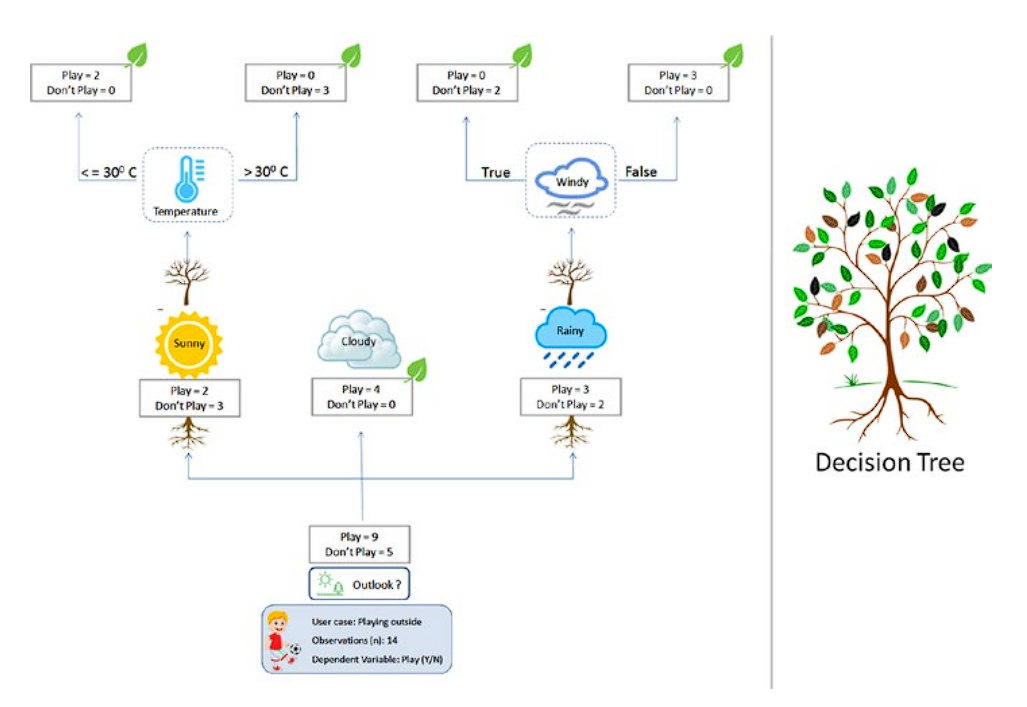

#### Use training data to build a tree generator model, which will determine which variable to split at a node and the value of the split. A decision to stop or split again assigns leaf nodes to a class. An advantage of a decision tree is that there is no need for the exclusive creation of dummy variables.

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [520]:
df = pd.read_csv('./drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [521]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


### EDA

#### Encode dependent and target variables

In [522]:
df['Sex'].unique(), df['BP'].unique(), df['Cholesterol'].unique()

(array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object))

In [523]:
df['Sex'].replace({'M':0,'F':1}, inplace=True)
df['BP'].replace({'LOW':0,'NORMAL':1,'HIGH':2},inplace=True)
df['Cholesterol'].replace({'NORMAL':0,'HIGH':1},inplace=True)

In [524]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Drug'] = le.fit_transform(df['Drug'])

#### Check correlation between params

In [525]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,-0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,-0.102027,1.000000,0.044952,-0.008811,0.125008,0.098573
BP,-0.120918,0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,-0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,0.098573,-0.328665,-0.055629,0.589120,1.000000


<Axes: >

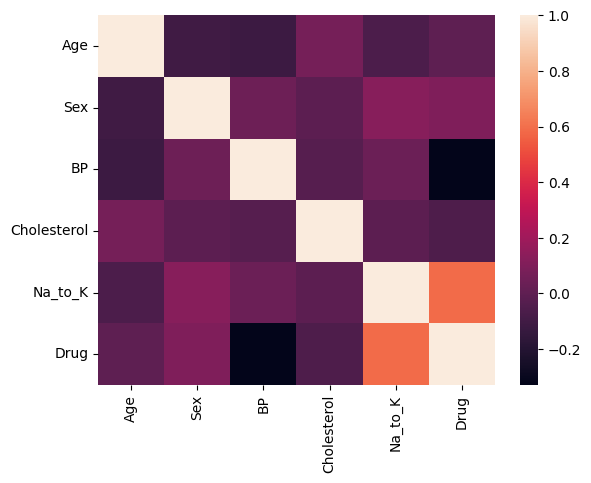

In [526]:
sns.heatmap(df.corr())

##### Function to drop small corr columns

In [527]:
def dropSmallCorr(dataframe: pd.DataFrame, targetCol: str, minCorr: int):
    df = dataframe.copy()
    corr = df.corr()[targetCol]

    for param in corr.index:
        if -minCorr <= corr[param] <= minCorr:
            df.drop(columns=[param], inplace=True)
        
    return df

#### Dropping columns with -0.1 <= correlation <= 0.1

In [528]:
df = dropSmallCorr(df,'Drug',0.1)
df.head()

,BP,Na_to_K,Drug
0,2,25.355,4
1,0,13.093,2
2,0,10.114,2
3,1,7.798,3
4,0,18.043,4


### Preparing data for being fitted into model

#### Scaling Na_to_K column using Standard scaler

In [529]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
df['Na_to_K'] = scale.fit_transform(df[['Na_to_K']])

#### Preparing x,y and splitting into train test

In [530]:
x = df.drop(columns=['Drug'])
y = df['Drug']

In [531]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=10, test_size=0.35)

### Model training

In [532]:
from sklearn.tree import DecisionTreeClassifier, export_text

model = DecisionTreeClassifier()

In [533]:
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [534]:
ypred = model.predict(xtest)

### Model metrics

##### New: Writing down tree rules in a rules text file

In [535]:
with open('rules.txt','w') as file:
    file.write(export_text(model, feature_names=list(xtrain.columns)))

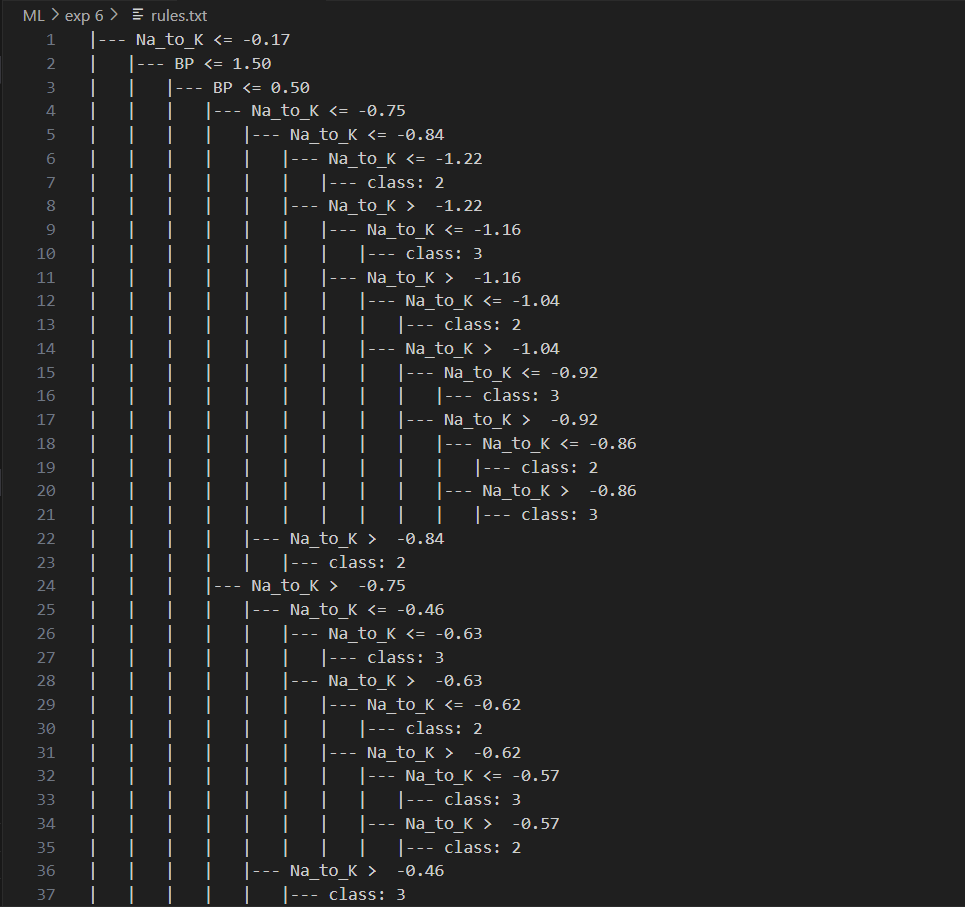

In [536]:
from sklearn.metrics import *

print("Accuracy score is: {}%".format(accuracy_score(ytest,ypred)*100))
print("Confusion matrix is: \n")
print(confusion_matrix(ytest, ypred))

Accuracy score is: 82.85714285714286%
Confusion matrix is: 

[[ 8  1  0  0  0]
 [ 5  1  0  0  0]
 [ 0  0  3  5  0]
 [ 0  0  1 18  0]
 [ 0  0  0  0 28]]
